In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt 
from tabulate import tabulate
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
import numpy as np

In [2]:
print("Téléchargement de la structure de bande du ScSbPt...")
m = MPRester("XOCzg18zLbitVQMZilg0OGK9MJ5rjMXh")
bandstructure = m.get_bandstructure_by_material_id("mp-7173")
print("Téléchargement terminé !")

Téléchargement de la structure de bande du ScSbPt...


Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Téléchargement terminé !


In [3]:
plot = plotter.BSPlotter(bandstructure)
data = plot.bs_plot_data()
zero_energy = data.get('zero_energy')
distance = data.get('ticks').get('distance')
labels = data.get('ticks').get('label')
distances = data.get('distances')
energy = data.get('energy')
bandgap = bandstructure.get_band_gap()
vbmData = bandstructure.get_vbm()
cbmData = bandstructure.get_cbm()
hbar2 = ((6.62607004*10**(-34))/(2*np.pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10)

In [4]:
print(tabulate([["Énergie de la bande interdite : ",str(bandgap.get('energy'))+" eV"],
	            ["Bande interdite directe ? ",str(bandgap.get('direct'))],
	            ["Transition dans la bande interdite : ",str(bandgap.get('transition'))]],
	            headers=["",""]))


------------------------------------  ---------------------
Énergie de la bande interdite :       0.6440999999999999 eV
Bande interdite directe ?             False
Transition dans la bande interdite :  \Gamma-X


In [5]:
print("Maximum de la dernière bande de valence : ")
print(tabulate([["Bande(s) contenant le VBM : ",str(vbmData.get('band_index'))],
	            ["Énergie du VBM : ",str(vbmData.get('energy'))+" eV"],
	            ["(sur le graphe MP (E-Efermi) : ",str(vbmData.get('energy')-zero_energy)+" eV)"]],
	            headers=["",""]))

Maximum de la dernière bande de valence : 

------------------------------  ---------------------------------------------------------
Bande(s) contenant le VBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11, 12]})
Énergie du VBM :                6.9398 eV
(sur le graphe MP (E-Efermi) :  0.0 eV)


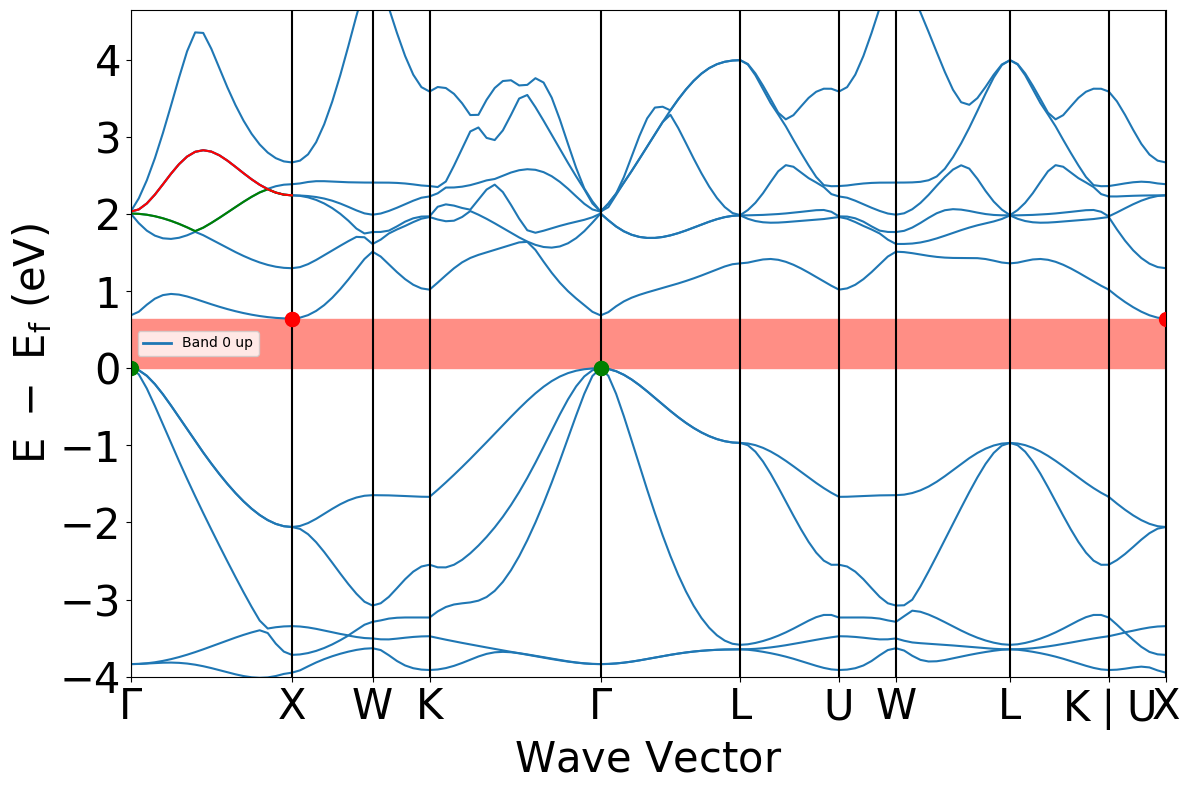

In [6]:
#affichage de la structure de bandes électroniques
plot.get_plot()
plt.fill_between(np.linspace(distance[0],distance[-1],500),0,bandgap.get('energy'),color="#FF8E85")

for i in range(len(energy)):
	plt.plot(distances[i],energy.get('1')[i][15],'g')
	plt.plot(distances[i],energy.get('1')[i][16],'r')

cbms = data.get('cbm')
for i in range(len(cbms)):
	(a,b) = cbms[i]
	plt.plot(a,b,'or',markersize=10)
vbms = data.get('vbm')
for i in range(len(vbms)):
	(a,b) = vbms[i]
	plt.plot(a,b,'og',markersize=10)

In [28]:
cbm = bandstructure.get_cbm()
vbm = bandstructure.get_vbm()

In [29]:
distances = data['distances']
energy = data['energy']

Valence = [] 
Conduction = []

for i in range(len(distances)):
    dx = distances[i][0]-distances[i][-1]
    
    dy_Valence = energy['1'][i][9][0]-energy['1'][i][9][-1] 
    dy_Conduction = energy['1'][i][10][0]-energy['1'][i][10][-1]
    
    slope_Valence = abs(dy_Valence/dx)
    slope_Conduction = abs(dy_Conduction/dx)
    
    Conduction.append(slope_Conduction)
    Valence.append(slope_Valence)
print("Dernière bande de valence:\n " )    
print(Valence)
print("\n\n Première bande de conduction:\n ")
print(Conduction)




Dernière bande de valence:
 
[0.12158312792829508, 0.43383301881694625, 0.08230314547778111, 0.3465749004792696, 0.22509729696906633, 0.2819496860310634, 0.08230314547778123, 0.20302401795305935, 0.2819496860310641, 0.6958356844939428]


 Première bande de conduction:
 
[3.40259794753638, 0.11334192846202551, 0.16201633183213648, 3.1005647683895465, 4.213407859341651, 0.5883228274814344, 0.16201633183213668, 0.42849434830914884, 0.5883228274814357, 0.32230602424864213]


Grâce aux tableaux ci-dessus, on peut voir que la plus grosse dispersion dans la dernière bande de valence est entre K et X (index 9) et que la plus petite est entre W et K (index 2).

On peut faire la même chose pour la première bande de conduction. La plus grosse dispersion est entre Γ et L, et la plus petite entre X et W




In [30]:
hbarre = 6.62607015e-34/(2*np.pi)  # J/s
eV = 1.6022e-19     # pour passer de eV à Joule
A = 1e-10

Valence_k = bandstructure.get_vbm()['kpoint'].frac_coords
Cond_k = bandstructure.get_cbm()['kpoint'].frac_coords

Valence_energy = bandstructure.get_vbm()['energy'] 
Cond_energy = bandstructure.get_cbm()['energy'] 

Valence_masse = (hbarre**2*(Valence_k[0]**2+Valence_k[1]**2+Valence_k[2]**2))/(2*Valence_energy*eV*A**2)
Cond_masse = (hbarre**2*(Cond_k[0]**2+Cond_k[1]**2+Cond_k[2]**2))/(2*Cond_energy*eV*A**2)


print("La masse effective au sommet de la dernière bande de valence est de",Valence_masse,"kg\n")
print("La masse effective à la base de la première bande de conduction est de",Cond_masse,"kg\n")

La masse effective au sommet de la dernière bande de valence est de 0.0 kg

La masse effective à la base de la première bande de conduction est de 2.2881421723331903e-31 kg

